# Initialization

In [1]:
import pandas as pd
import numpy as np

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('../data/mnist-in-csv/mnist_train.csv.zip', compression='zip')
test = pd.read_csv('../data/mnist-in-csv/mnist_test.csv.zip', compression='zip')


# Feature selection

Data as numpy array.

In [3]:
X_train=train.drop('label', axis=1).values
y_train=train.label.values
X_test=test.drop('label', axis=1).values
y_test=test.label.values

In [4]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

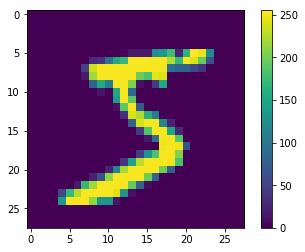

In [5]:
plt.figure()
plt.imshow(X_train[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
y_train[0]

5

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0


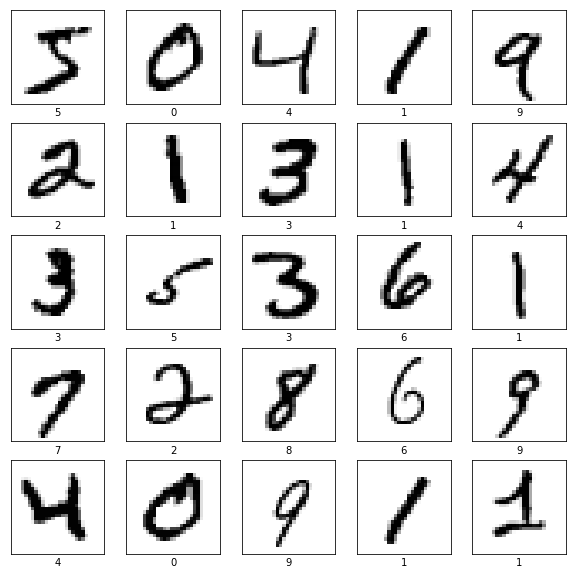

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2515 - acc: 0.9280
Epoch 2/2
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1096 - acc: 0.9675


In [12]:
print("Generating test predictions...")
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)


Generating test predictions...
10000/10000 [==============================] - 0s 31us/sample - loss: 0.0985 - acc: 0.9691
Test accuracy: 0.9691


In [13]:
predictions = model.predict(X_test)
predictions[0]

array([4.7203008e-07, 1.1114903e-07, 1.9628216e-04, 6.1977253e-04,
       3.6804867e-08, 1.7676728e-06, 1.2992413e-10, 9.9915540e-01,
       1.2255199e-06, 2.4927956e-05], dtype=float32)

In [14]:
np.argmax(predictions[0])

7

In [15]:
y_test[0]

7

In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

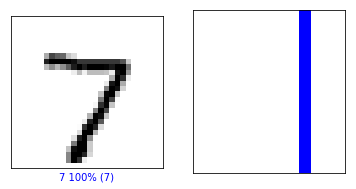

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

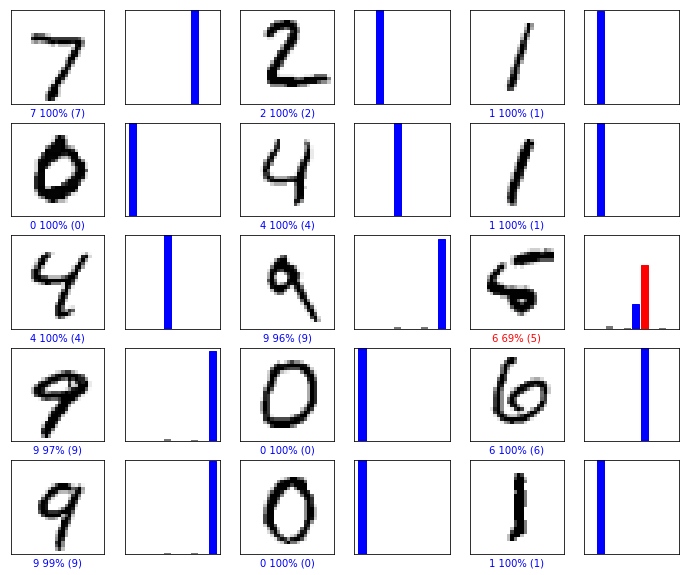

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

In [26]:
# Grab an image from the test dataset
img = X_test[9]

print(img.shape)

(784,)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 784)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.2656916e-07 2.6496436e-09 2.7922356e-06 1.0077936e-06 2.3172360e-02
  2.2116825e-07 2.1508678e-10 9.9233724e-03 3.4109562e-05 9.6686584e-01]]


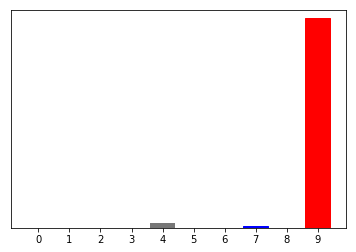

In [29]:
plot_value_array(0, predictions_single, y_test)
plt.xticks(range(10), class_names)
plt.show()

In [23]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

7
